# Computação vetorizada com NumPy

Exemplo adaptado de Nicolas P. Rougier em [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/)

## Random walk: solução OO

In [5]:
import random

class RandomWalker:
    def __init__(self):
        self.position = 0
        self.path = []

    def step(self):
        self.position += random.choice([-1, 1])
        self.path.append(self.position)
    
    def walk(self, steps):
        for _ in range(steps):
            self.step()
        return self.path

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
walker = RandomWalker()
walker.walk(10)

[-1, -2, -3, -4, -3, -2, -1, -2, -1, -2]

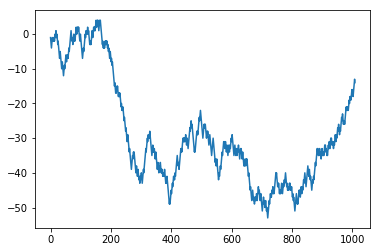

In [12]:
plt.plot(walker.walk(1000))
plt.show()

**Line magic**

In [13]:
%magic

**Cell Magic**

In [14]:
%%timeit -n 1000
walker.walk(1000)

1000 loops, best of 3: 1.71 ms per loop


### Random Walk: solução procedural

In [15]:
def random_walk(n):
    position = 0
    walk = [position]
    for i in range(n):
        position += random.choice([-1, 1])
        walk.append(position)
    return walk

In [24]:
%%timeit -n 1000
walk = random_walk(1000)

1000 loops, best of 3: 1.32 ms per loop


### Random Walk: solução vetorizada com `itertools`

In [32]:
from itertools import accumulate
g = accumulate([1,2,3,4,5])
g

In [35]:
#list(_)
next(g)

6

**? abre um help - isso é do ipython**

In [41]:
#?random.choices

In [40]:
def random_walk_itertools(n):
    steps = random.choices([-1, 1], k=n)  # choice plural, Py ≥ 3.6
    return [0]+list(accumulate(steps))

In [37]:
%%timeit -n 1000
walk = random_walk_itertools(1000)

1000 loops, best of 3: 331 µs per loop


### Random Walk: solução vetorizada com NumPy

In [48]:
import numpy as np
# from numpy import * = require do ruby
np.random.choice([-1, 1], 10)

array([-1,  1,  1,  1,  1, -1, -1, -1, -1,  1])

In [49]:
def random_walk_numpy(n):
    steps = np.random.choice([-1, 1], n)  # choice singular!
    return np.cumsum(steps)

In [50]:
%%timeit -n 1000
walk = random_walk_numpy(1000)

1000 loops, best of 3: 29.3 µs per loop


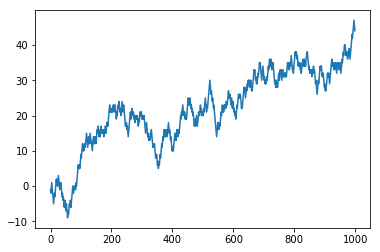

In [53]:
plt.plot(random_walk_numpy(1000))
plt.show()

## Comparando desempenhos

In [57]:
from timeit import timeit

In [58]:
# ?timeit

In [59]:
def cronometrar(expr, vezes=1000):
    return timeit(expr, globals=globals(), number=vezes) / vezes
     
casos = ['RandomWalker().walk(1000)',
          'random_walk(1000)',
          'random_walk_itertools(1000)',
          'random_walk_numpy(1000)',
         ]

In [60]:
tempos = []
for caso in casos:
    t = cronometrar(caso)
    print(f'{t:07f}s', caso, sep='\t')
    tempos.append(t)

0.001720s	RandomWalker().walk(1000)
0.001309s	random_walk(1000)
0.000338s	random_walk_itertools(1000)
0.000027s	random_walk_numpy(1000)


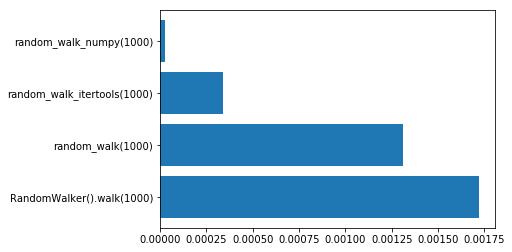

In [61]:
fig, ax = plt.subplots()
posições = np.arange(len(casos))
ax.barh(posições, tempos)
ax.set_yticks(posições)
ax.set_yticklabels(casos)
plt.show()

## Aplicação vetorizada de fórmulas

Arremesso de um objeto com `v0 = 5m/s`.

In [69]:
import numpy as np
import matplotlib.pyplot as plt

v0 = 5
g = 9.81

In [74]:
t = np.linspace(0, 1, 1001)
t

array([ 0.   ,  0.001,  0.002, ...,  0.998,  0.999,  1.   ])

In [76]:
y = v0 * t - g * t**2 / 2
y

array([ 0.        ,  0.00499509,  0.00998038, ...,  0.10460038,
        0.09980509,  0.095     ])

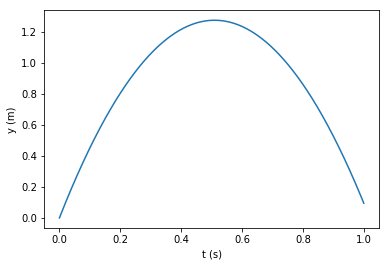

In [77]:
plt.plot(t, y)
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.show()

In [ ]:
?y

## Referências

* [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/) (veja também a [bibliografia](http://www.labri.fr/perso/nrougier/from-python-to-numpy/#bibliography) deste livro livre)
   
* StackExchange: [How do I move away from the “for-loop” school of thought?](https://softwareengineering.stackexchange.com/questions/254475/how-do-i-move-away-from-the-for-loop-school-of-thought)